## 不懂为什么，这个不会输出日志文件

### 默认情况下，logging模块将日志打印到屏幕上(stdout)，日志级别为WARNING(即只有日志级别高于WARNING的日志信息才会输出)，日志格式如下图所示


In [2]:
import logging

In [4]:
logging.debug('debug message')
logging.info('info message')
logging.warning('warn message')
logging.error('error message')
logging.critical('critical message')

ERROR:root:error message
CRITICAL:root:critical message


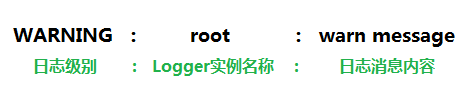


| 级别 | 何时使用 |
|:-------------:|:-------------:| 
| DEBUG| 详细信息，典型地调试问题时会感兴趣。|
| INFO| 证明事情按预期工作。|
| WARNING|表明发生了一些意外，或者不久的将来会发生问题（如‘磁盘满了’）。软件还是在正常工作。|
| ERROR|由于更严重的问题，软件已不能执行一些功能了。|
| CRITICAL|严重错误，表明软件已不能继续运行了。|


### 可通过basicConfig来配置

In [7]:
logging.basicConfig(filename='logger.log', level=logging.INFO)

logging.debug('debug message')
logging.info('info message')
logging.warning('warn message')
logging.error('error message')
logging.critical('critical message')


ERROR:root:error message
CRITICAL:root:critical message


### 几个重要的概念

* Logger 记录器，暴露了应用程序代码能直接使用的接口。
* Handler 处理器，将（记录器产生的）日志记录发送至合适的目的地。
* Filter 过滤器，提供了更好的粒度控制，它可以决定输出哪些日志记录。
* Formatter 格式化器，指明了最终输出中日志记录的布局。



####  记录日志是通过调用Logger 的实例（后面称之为 记录器／loggers）的方法来完成的。 每个实例都有名字，它们在概念上组织成一个层级式的命名空间，使用点（.）作为分隔符。例如，名为‘scan’的Logger是Logger:‘scan.text’、‘scan.html’和‘scan.pdf’的父节点。记录器名字可以任意命名，用以表示记录的信息是在应用的哪个部分所产生的。

In [9]:
logging.basicConfig(level=logging.INFO, format='%(asctime)s %(filename)s[line:%(lineno)d] %(levelname)s %(message)s',
                    datefmt='%a, %d %b %Y %H:%M:%S', filename='basic.log', filemode='w')
logging.info('infoinfoinfo')
logging.error('errorerrorerror')
console = logging.StreamHandler()
console.setLevel(logging.WARNING)
console.setFormatter(logging.Formatter('%(name)-12s: %(levelname)-8s %(message)s'))
# test父
logger = logging.getLogger('test').addHandler(console)
logging.warning('warning')
logging.info('infoinfo')
# test.a  test.b 子
loggera = logging.getLogger('test.a')
loggerb = logging.getLogger('test.b')
loggera.info('ainfo')
loggera.error('aerror')
loggerb.warning('bwarninh')


ERROR:root:errorerrorerror
test.a      : ERROR    aerror
test.a      : ERROR    aerror
ERROR:test.a:aerror
test.b      : WARNING  bwarninh
test.b      : WARNING  bwarninh
